# Data Visualization Exam

The scores will be based not only on the generation of figures, but also on the **quality** of the visualizations, following the **data visualization principles discussed in class**, and the **clarity and self-explanatory nature** of the figures.

You are free to use any tool of your choice.

Please submit your work as a **PDF file**, named as:
name_surname.pdf
and send it to snoei@fbk.eu


Total: 30 Points

---

# Section A: Questions (10 points)

**Instructions**: Answer the following questions

1. Dimensionality reduction algorithms can generate
artifacts in data representation. Explain in detail the previous
sentence and show some explanatory plots.

When you use techniques to reduce the number of dimensions in a dataset, the new lower-dimensional representation may not perfectly reflect the original data, and can introduce distortions or misleading pattern. This happens because the algorithm used are able to only capture local or global structure of data using a linear or non-linear method. Examples of dimensionality reduction algorithms are PCA, MSE, t-SNE, Isomap, UMAP and many others.
For example, using PCA, we project data linearly, with the possibility to flatten nonlinear structures like spirals and rolls.

A concrete example is for example a vertical spiral and using PCA, we obtain the two most fartest points are really close in the new dimension; another example is the classical swiss roll.

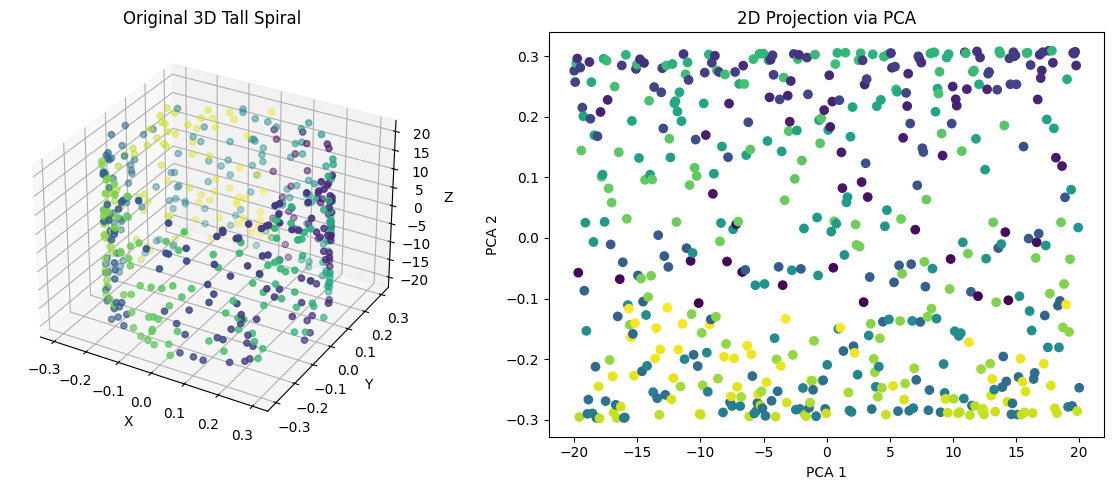

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# generate a simple spiral
n_samples = 500
t = 4 * np.pi * (1 + np.random.rand(n_samples))
z = np.linspace(-20, 20, n_samples)
x = 0.3 * np.sin(t)
y = 0.3 * np.cos(t)
X = np.vstack((x, y, z)).T
color = t  # use different colors for better viz

X_pca = PCA(n_components=2).fit_transform(X)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax1.set_title("Original 3D Tall Spiral")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis)
ax2.set_title("2D Projection via PCA")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


2. Using the disease.csv dataset to reproduce the following figure

![figure](Fig.png)

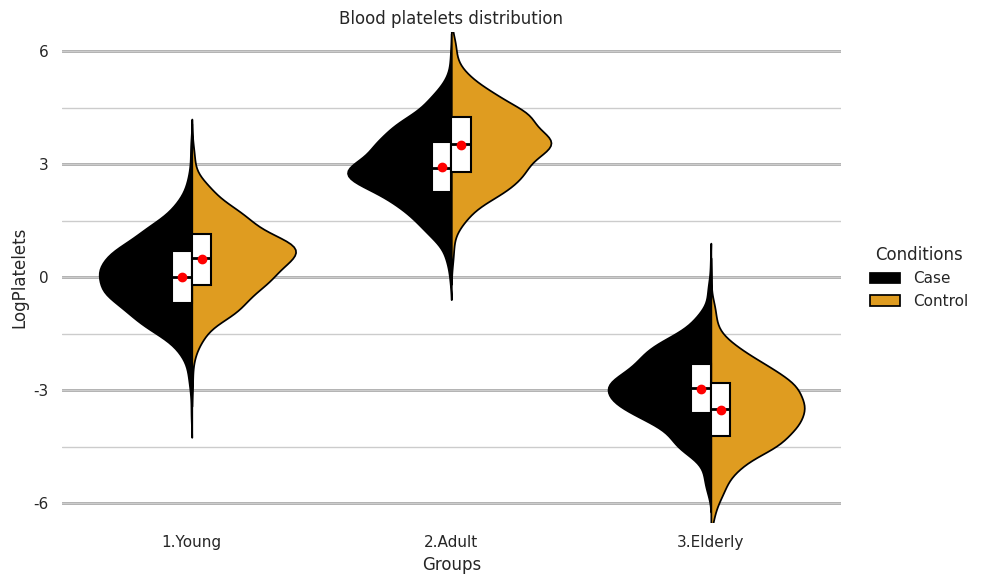

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file
df = pd.read_csv("./disease.csv")

# Generate numbered x-axis labels
unique_groups = df['Groups'].unique()
label_map = {group: f"{i+1}.{group}" for i, group in enumerate(unique_groups)}
df['Groups_Num'] = df['Groups'].map(label_map)

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Create violin plot WITHOUT inner boxplot
ax = sns.violinplot(
    x='Groups_Num',
    y='LogPlatelets',
    hue='Conditions',
    data=df,
    split=True,
    inner=None,  # no inner boxplot
    palette={'Case': 'black', 'Control': 'orange'}
)

# Overlay boxplots separately
sns.boxplot(
    x='Groups_Num',
    y='LogPlatelets',
    hue='Conditions',
    data=df,
    showcaps=False,
    boxprops=dict(facecolor='white', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=0),
    flierprops=dict(marker=''),
    medianprops=dict(color='black', linewidth=2),
    meanprops=({"marker":"o","markerfacecolor":"red", "markeredgecolor":"red"}),
    showmeans=True,
    dodge=True,
    width=0.15,
    ax=ax
)

# Remove duplicate legends
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[0:2], labels[0:2], title='Conditions', loc='center left', bbox_to_anchor=(1.02, 0.5))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none')
legend.set_frame_on(False)

# --- Y-axis ticks: 9 lines with only 5 labeled (6, 3, 0, -3, -6) ---
yticks = np.linspace(-6, 6, 9)  # 9 evenly spaced ticks from -6 to 6
ax.set_yticks(yticks)

labels_map = {6: "6", 3: "3", 0: "0", -3: "-3", -6: "-6"}
yticklabels = [labels_map.get(round(t), "") for t in yticks]
ax.set_yticklabels(yticklabels)

# Customize tick lines width
# Customize tick lines width - ensure they are behind the plot
for t in yticks:
    line_width = 2 if round(t) in labels_map else 0.5  # Major ticks thicker, others thinner
    ax.axhline(y=t, color='gray', linewidth=line_width, alpha=0.7, zorder=0)  # zorder=0 places lines behind

# Remove vertical boundary lines (right and top spines)
ax.set_ylim(-6.5, 6.5)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove vertical grid lines, keep horizontal ones only
ax.grid(True, axis='y')  # horizontal grid lines only
ax.grid(False, axis='x') # no vertical grid lines

# Axis labels and legend
ax.set_xlabel("Groups")
ax.set_ylabel("LogPlatelets")
plt.title("Blood platelets distribution")

plt.tight_layout()
plt.show()


3.Describe in detail the meaning of the visual encoding
elements and their attributes in the following infographic reporting the
vertical bedrock uplift in Greenland in 2012  

![image](info.png).

In [ ]:
# your answer here

# Section B: Visualization Design & Justification (20 Points)

**Scenario**: You are a data scientist approached by an airline that has shared its flight data with you, including monthly passenger counts from 1949 to 1960.

**Instructions**:  
Using the provided data, complete the following tasks:

- Propose an appropriate visualization to illustrate **seasonal trends** in passenger numbers.
- Analyze and visualize the **trend in passenger numbers from 1949 to 1960**.
- Create visualizations for the **number of passengers per month**, shown both:
  - Across multiple years, and
  - Aggregated (i.e., merged across years).
- Using the `state_flights_1960` dataset, visualize the **net passenger flow for each U.S. state**.
- Identify and describe any **patterns or anomalies** observed in the data.
- Write a **report summarizing your findings**.

> **Note**: Due to space constraints, your report may include **only two figures**, and **both figures combined must not exceed half an A4 page**. You may use **multiple panels** within each figure if needed.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

flights = sns.load_dataset("flights")
flights_state = pd.read_csv("state_flights_1960.csv")
# Your visualization codes here


In [ ]:
#1 trend for years you can use a line while for season as bars